In [2]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

/Users/laharibr/Desktop/facemask/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
data_train_path = 'Face Mask Dataset/Train'
data_val_path = 'Face Mask Dataset/Validation'

In [5]:
img_width = 180
img_height = 180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 50,
    validation_split = False
)

Found 10000 files belonging to 2 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size = (img_width, img_height),
    batch_size = 50,
    validation_split = False
)

Found 800 files belonging to 2 classes.


2024-12-08 18:29:07.576475: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


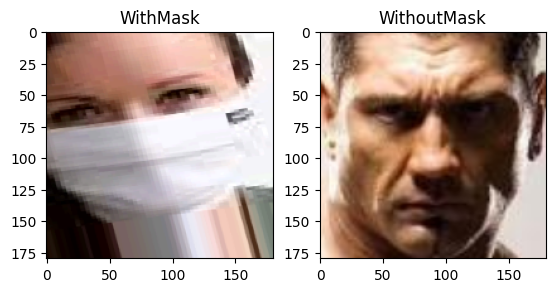

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(2):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])

In [10]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units = len(data_cat))
])

In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs, batch_size=50, verbose=1)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 92s 456ms/step - accuracy: 0.8311 - loss: 0.4281 - val_accuracy: 0.9600 - val_loss: 0.1058
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 103s 513ms/step - accuracy: 0.9736 - loss: 0.0823 - val_accuracy: 0.9925 - val_loss: 0.0353
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 96s 480ms/step - accuracy: 0.9846 - loss: 0.0434 - val_accuracy: 0.9912 - val_loss: 0.0301
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 107s 535ms/step - accuracy: 0.9886 - loss: 0.0323 - val_accuracy: 0.9812 - val_loss: 0.0611
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 110s 551ms/step - accuracy: 0.9895 - loss: 0.0308 - val_accuracy: 0.9900 - val_loss: 0.0263
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 538ms/step - accuracy: 0.9884 - loss: 0.0341 - val_accuracy: 0.9887 - val_loss: 0.0348
Epoch 7/20
 40/200 ━━━━━━━━━━━━━━━━━━━━ 1:23 519ms/step - accuracy: 0.9927 - loss: 0.0189

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_val

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Text(0.5, 1.0, 'Loss')

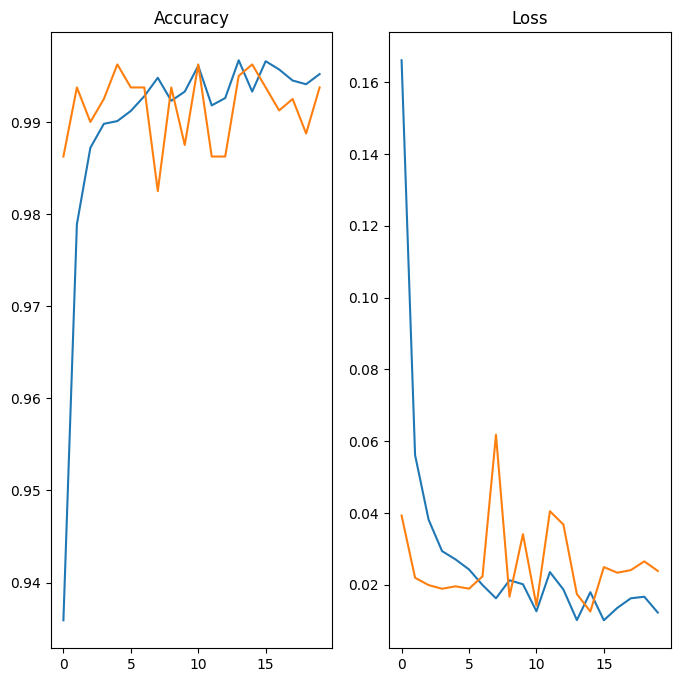

In [ ]:
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'],label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [ ]:
from tf.keras.models import load_model
